<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot.
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [52]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [53]:
image = np.array(Image.open('images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Original Shape of image: (100, 100, 3)
Single Channel image's shape: (100, 100)


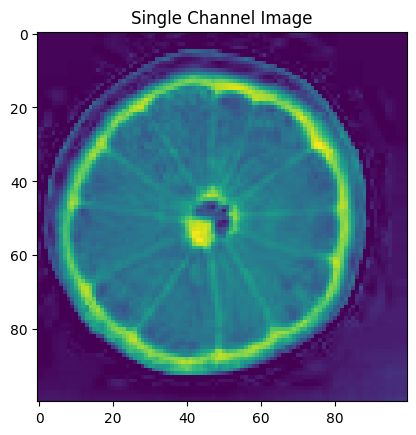

In [54]:
#Below will display original shape of image
print("Original Shape of image:", image.shape)

#this line will extract single channel from image(last colored channel)
img_single_channel = image[:, :, -1]

#this line will print img_single_channel: shape of single channel image
print("Single Channel image's shape:", img_single_channel.shape)

#below will basically plot the image on screen
plt.figure()

plt.imshow(img_single_channel)
plt.title("Single Channel Image")

plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Average Channel Image Shape: (100, 100)


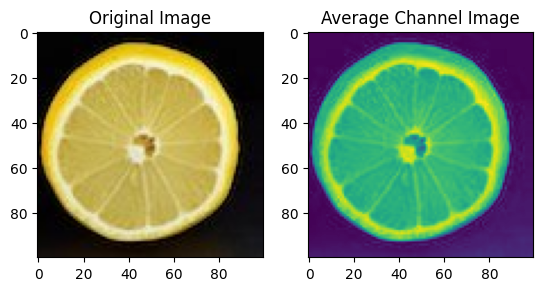

In [55]:
#this line will calculate average channel image and store it in img_average_channel.
img_average_channel = np.mean(image, axis=-1)

#this line will print shape of image which is basically rows and columns
print("Average Channel Image Shape:", img_average_channel.shape)

#plots the image
plt.figure()
plt.subplot(1, 2, 1) #1 row, 2 columns, first subplot
plt.imshow(image) #original image
plt.title("Original Image")
plt.subplot(1, 2, 2) #1 row, 2 columns, second subplot
plt.imshow(img_average_channel) #image with average color value
plt.title("Average Channel Image")
plt.show()
#while looking at differences and which one is better, it all depends on the specific usecase. Average channel image is preferred for color information whereas part 1 image is preferred while working with blue channel.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [56]:
#Identity matrix is a square matrix of any order which has diagonal elements with value 1 and rest with value 0
#when you multiply any matrix with identity matrix, it gives the same matrix itself. Meaning, a matrix M multiplied with identity matrix gives M.

#below line will create identity_matrix with same rows/size as that of img_average_channel
identity_matrix = np.eye(img_average_channel.shape[0])

#it will pick a random row out of the identity matrix
random_row_index = np.random.randint(0, identity_matrix.shape[0])

print("A random row picked from identity matrix", identity_matrix[random_row_index]) #this row will only have one 1 and rest 0's

A random row picked from identity matrix [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`.

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [57]:
#it will create an array with values from 0 to number of rows img_average_channel has
rows = np.arange(img_average_channel.shape[0])

np.random.shuffle(rows) #shuffling the array

print("Shuffled Rows", rows)

Shuffled Rows [54 39 64 38 61 20 65  3 35 97 48  5  0 22 58 28 29 96 60 40 79 76 49 33
 43 52 50 51 90 85 91  8 37 12 59 70 68 36 93 69 46 55  1  2 89  7 19 32
 45 66 99 16 80 88 11 26 78 67 57 95 24 53 34 10 21 87 13 14 83 44 56 73
 31 62 17 27 75 84 23 15  6 30 42 98 74 77  9  4 71 41 25 47 86 72 82 81
 63 18 94 92]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [58]:
#here, we are creating a matrix T which will have same elements as that of identity matrix but the order will be determined by rows matrix.
#meaning: the values of rows matrix will be the place where "1" will be in T's row.
#If rows matrix's value is [3,0,1,2], then this means that T will have its first row with 4th element 1, second row with 1st element 1 and so on.
#It is basically, doing permutation of another matrix and it will introduce randomness and disorder.

T = identity_matrix[rows]

if T.shape != identity_matrix.shape:
    T = T.reshape(identity_matrix.shape)

#print(T.shape==identity_matrix.shape)
#print(T.shape==identity_matrix.shape)
print("Shape of T:", T.shape)

Shape of T: (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see.
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image.

Shape of transformed image (100, 100)


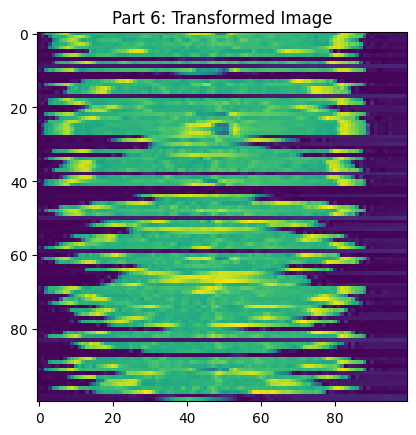

In [59]:
#calculating transformed image by matrix multiplication of T and img_average_channel
transformed_image = np.dot(T, img_average_channel)

print("Shape of transformed image", transformed_image.shape)

#plotting transformed image
plt.figure()
plt.imshow(transformed_image)
plt.title("Part 6: Transformed Image")
plt.show()
#the transformed image is scrambled and rows are rearranged

#the dot products in matrix multiplication is basically shuffles based on rows array to create a transformed image.
#as T contains order in which rows to be placed for transformed image, it helps to pick rows from original image and in which order.
#it will still have same set of pixel values but now in arranged in different order.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

matrix T is invertible


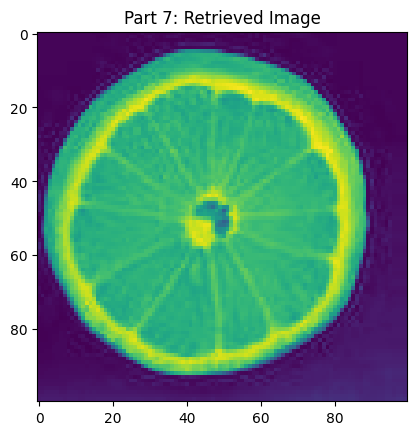

In [60]:
#matrix T is invertible if its determinant is not zero
det_T = np.linalg.det(T)

if det_T!=0:
  print("matrix T is invertible")
  Tinv = np.linalg.inv(T)
  retrieved_image = np.dot(Tinv, transformed_image)
  plt.figure()
  plt.imshow(retrieved_image)
  plt.title("Part 7: Retrieved Image")
  plt.show()
else:
  print("matrix T is not invertible")

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image.

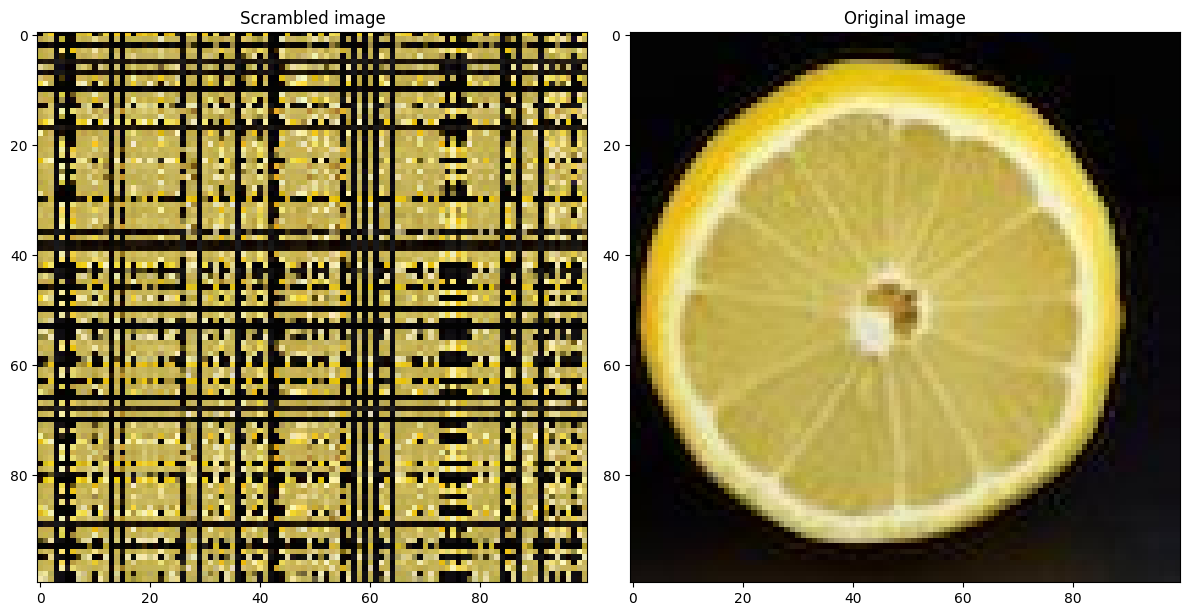

In [61]:
#creating identity matrix for row and column scrambling with exact number of rows and cols as that of image respectively
identity_matrix_rows = np.eye(image.shape[0])
identity_matrix_columns = np.eye(image.shape[1])

#shuffling indices
num_rows = image.shape[0]
num_columns = image.shape[1]
rows = np.arange(num_rows)
columns = np.arange(num_columns)
np.random.shuffle(rows)
np.random.shuffle(columns)

#creating empty arrays respectively
scrambled_image = np.zeros_like(image)
recovered_image = np.zeros_like(image)

#scramble and recover each color channel
for channel in range(3):
    img_channel = image[:, :, channel]
    T_rows = identity_matrix_rows[rows, :]
    T_columns = identity_matrix_columns[:, columns]
    scrambled_image[:, :, channel] = np.dot(T_rows, np.dot(img_channel, T_columns))

    T_rows_inv = np.linalg.inv(T_rows)
    T_columns_inv = np.linalg.inv(T_columns)
    recovered_image[:, :, channel] = np.dot(T_rows_inv, np.dot(scrambled_image[:, :, channel], T_columns_inv))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(scrambled_image)
plt.title('Scrambled image')


plt.subplot(1, 2, 2)
plt.imshow(recovered_image)
plt.title('Original image')


plt.tight_layout()
plt.show()
